In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [40]:
df = pd.read_csv(r"C:\Users\User\Desktop\Assignment3\traffic.csv")
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


# Q10: How does traffic situation distribution vary by day of the week?

First we need to convert **Traffic Situation** as a categorical and manually rename categorical values using the `rename_caegories` method.

In [4]:
df['Traffic Situation Numeric'] = df['Traffic Situation'].astype('category').cat.rename_categories({'low':0, 'normal': 1, 'heavy': 2, 'high': 3})
df['Traffic Situation Numeric'].value_counts()

Traffic Situation Numeric
1    1669
2     682
3     321
0     304
Name: count, dtype: int64

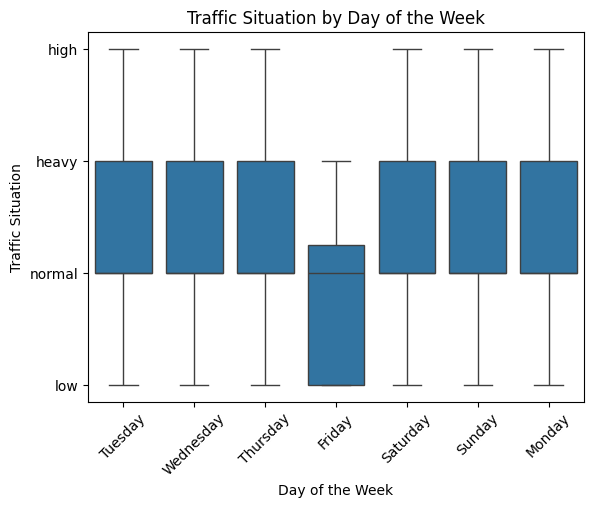

In [5]:
#Using seaborn boxplot due to easier customization syntax 

ax = sns.boxplot(x="Day of the week", y="Traffic Situation Numeric", data=df, order = ["Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"]) #Setting up order 

# # Map numeric values back to categorical labels
ax.set_yticks([0, 1, 2, 3])  # Adjust based on category count
ax.set_yticklabels(["low", "normal", "heavy", "high"])
ax.invert_yaxis()  # Reverse the y-axis as it was showing up side down
#Plot title and labels
plt.title("Traffic Situation by Day of the Week")
plt.ylabel("Traffic Situation")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [6]:
#Investigatting the taffic situation by day of the week focusing more on Friday as it has the no high traffic situation data
#This can be seen below
df.groupby('Day of the week')['Traffic Situation'].value_counts()

Day of the week  Traffic Situation
Friday           normal               170
                 low                  118
                 heavy                 96
Monday           normal               214
                 heavy                 86
                 high                  48
                 low                   36
Saturday         normal               234
                 heavy                 88
                 high                  39
                 low                   23
Sunday           normal               213
                 heavy                 81
                 high                  62
                 low                   28
Thursday         normal               282
                 heavy                108
                 high                  58
                 low                   32
Tuesday          normal               276
                 heavy                112
                 high                  55
                 low                   37

# Q11 What are the correlations between different vehicle types? 

Text(0.5, 1.0, 'Correlation Matrix of Vehicle Counts')

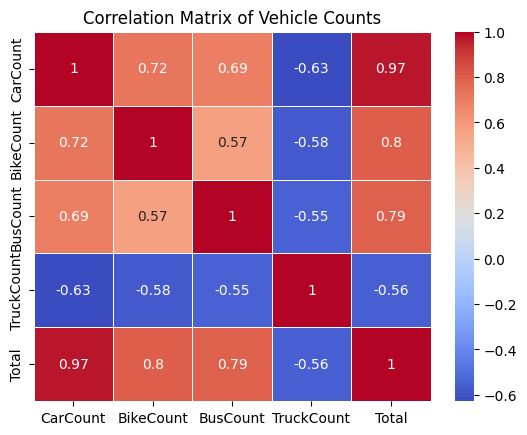

In [7]:
# To display correlations I will simply plot a heatmap using seaborn
hm = df[["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]]
sns.heatmap(hm.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Vehicle Counts')

# Q12 How does the destribution of traffic situations differ by hour? 

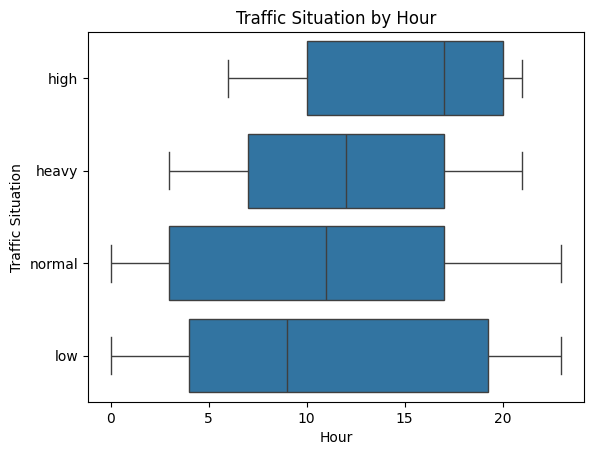

In [42]:
df["Time"] = pd.to_datetime(df["Time"], format = "%I:%M:%S %p").dt.time
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df.head()

sns.boxplot(x = df['Hour'] , y = df['Traffic Situation'])
plt.title("Traffic Situation by Hour")
plt.gca().invert_yaxis()
plt.show()

# Q13. What is the distribution of total vehicle counts for each day of the week?

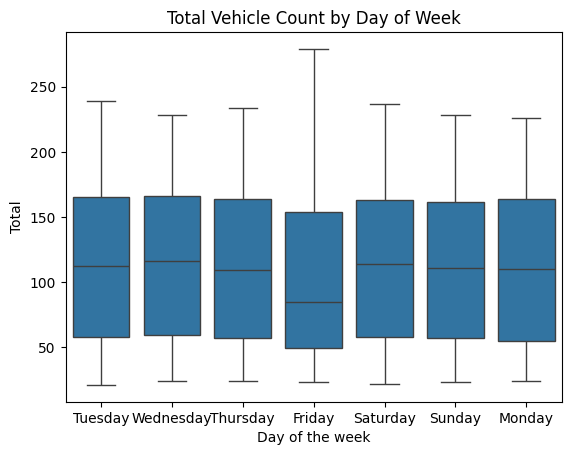

In [43]:
sns.boxplot(x="Day of the week", y = "Total", data = df ,order = ["Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday"])
plt.title("Total Vehicle Count by Day of Week")
plt.show()

Distribution appears to be uniform with a dip on Friday.

# Q14. How does the variance in vehicle counts compare across vehicle types?

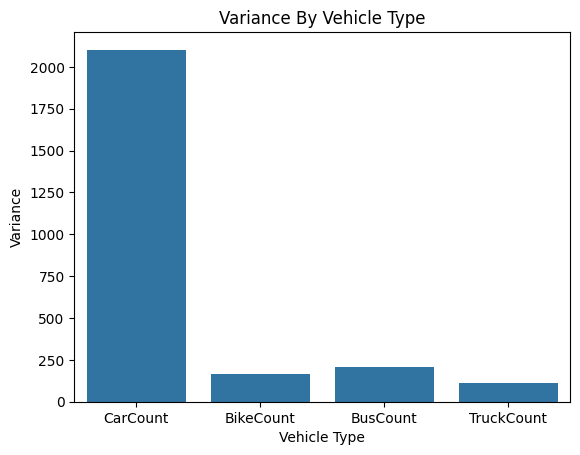

In [44]:
vehicle_type = ["CarCount", "BikeCount", "BusCount", "TruckCount"]
var_by_type = df[vehicle_type].var()

sns.barplot(x=vehicle_type, y = var_by_type )
plt.xlabel('Vehicle Type')
plt.ylabel('Variance')
plt.title("Variance By Vehicle Type")
plt.show()

CarCount variance is the highest by a large margin. 
Followed by BusCount, BikeCount then TruckCount.

# Q15. How does the average vehicle count for each type change over time?


C:\Users\User\AppData\Local\Temp\ipykernel_27628\3588447427.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



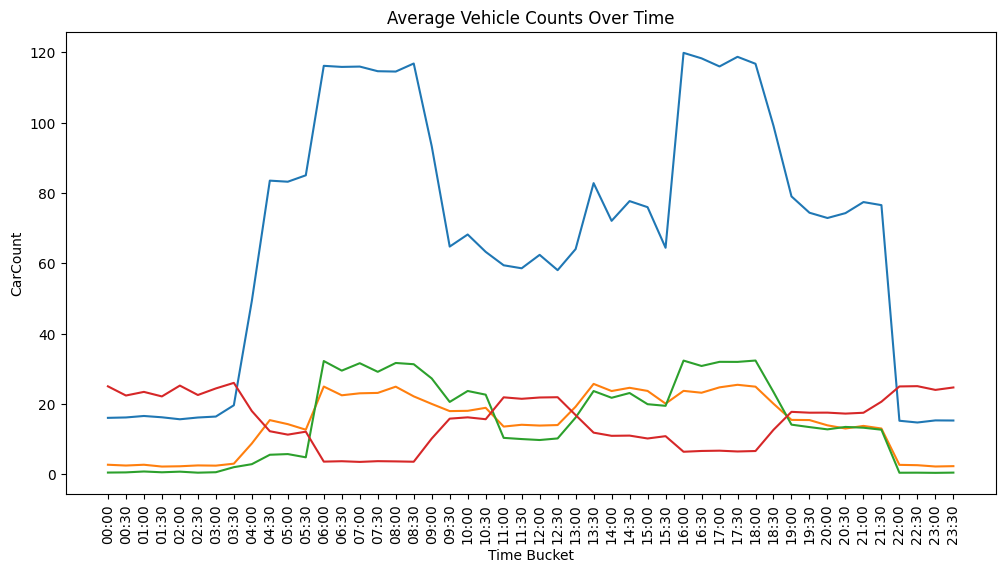

In [46]:
df["Minutes"] = df['Time'].apply(lambda x: x.hour * 60 + x.minute )
df['Time Bucket'] = pd.cut(df["Minutes"], bins = range(0,1441, 30), right = False, labels = [f"{h:02}:{m:02}" for h in range(0, 24) for m in range(0,60, 30)])

avg_counts = df.groupby("Time Bucket")[["CarCount", "BikeCount", "BusCount", "TruckCount"]].mean().reset_index()


plt.figure(figsize=(12, 6))
for vehicle in ["CarCount", "BikeCount", "BusCount", "TruckCount"]: 
    sns.lineplot(x = avg_counts['Time Bucket'], y = avg_counts[vehicle])
plt.title("Average Vehicle Counts Over Time")
plt.xticks(rotation = 90)
plt.show()

* This chart does not match the interactive chart on the assigmnet question. I will need to convert time and use the `cut` method to pool values into 15 min increments as per the visualization requested on the chart. 
I will reattempt the question in the cell below. 

In [47]:
import plotly.express as px 

fig = px.line(avg_counts, x="Time Bucket", y=["CarCount", "BikeCount", "BusCount", "TruckCount"], 
              labels={"value": "Average Count", "variable": "Vehicle Type", "Time Bucket": "Time"},
              title="Average Vehicle Counts Over Time")

fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Vehicle Type=CarCount<br>Time=%{x}<br>Average Count=%{y}<extra></extra>',
              'legendgroup': 'CarCount',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CarCount',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30',
                          '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00', '07:30',
                          '08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30',
                          '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30',
                          '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
                          '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30'],
                         dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('jDHGGGMMMEAppZRSSikwQJVSSimllD' ... '4555xzLUCllFJKKaUuQJVSSimllC5A'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Vehicle Type=BikeCount<br>Time=%{x}<br>Average Count=%{y}<extra></extra>',
              'legendgroup': 'BikeCount',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'BikeCount',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30',
                          '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00', '07:30',
                          '08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30',
                          '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30',
                          '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
                          '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30'],
                         dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('rbXWWmutBUDfe++9994DQK211lprrQ' ... 'RSSimlBECttdZaa60BQHTOOeeccwJA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Vehicle Type=BusCount<br>Time=%{x}<br>Average Count=%{y}<extra></extra>',
              'legendgroup': 'BusCount',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'BusCount',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30',
                          '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00', '07:30',
                          '08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30',
                          '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30',
                          '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
                          '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30'],
                         dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('+N5777333j8IIYQQQgjhP0oppZRSSu' ... 'xzzjnn3D/OOeecc87ZP++99957790/'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'Vehicle Type=TruckCount<br>Time=%{x}<br>Average Count=%{y}<extra></extra>',
              'legendgroup': 'TruckCount',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'}